array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1313cee50>,
      dtype=object)

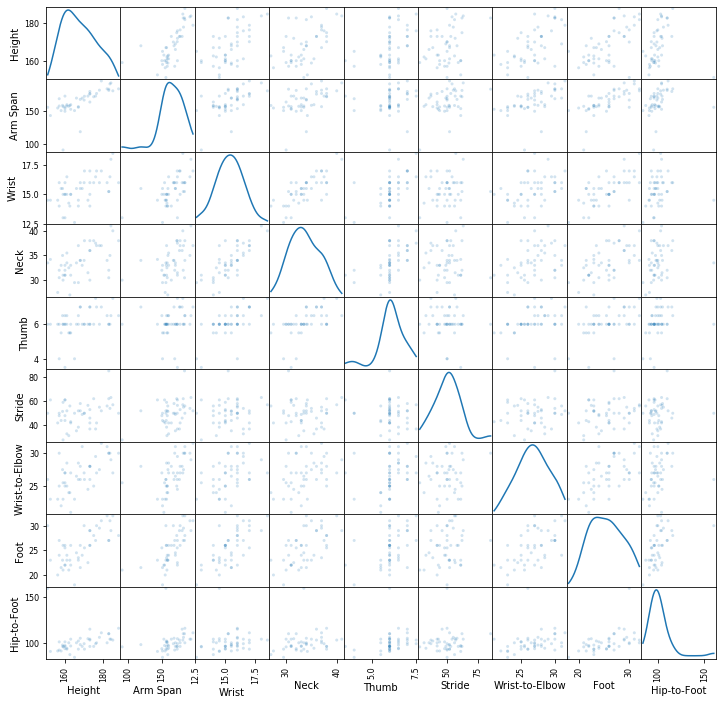

In [4]:
import pandas as pd
from pandas.plotting import scatter_matrix
df = pd.read_csv("Measurements.csv")
scatter_matrix(df, alpha = 0.2, figsize = (12, 12), diagonal = 'kde')

Set of variables vs r^2, where r is the Pearson correlation coefficient
         r^2         r      Variable 1      Variable 2
0   0.847837  0.920781        Arm Span          Height
22  0.630163  0.793828            Foot        Arm Span
21  0.590957  0.768737            Foot          Height
5   0.553428  0.743927            Neck           Wrist
16  0.514744  0.717457  Wrist-to-Elbow        Arm Span
15  0.501447  0.708129  Wrist-to-Elbow          Height
28  0.453162  0.673173     Hip-to-Foot          Height
2   0.444736  0.666885           Wrist        Arm Span
29  0.428799  0.654828     Hip-to-Foot        Arm Span
27  0.417752  0.646338            Foot  Wrist-to-Elbow
23  0.417612  0.646229            Foot           Wrist
4   0.364768  0.603960            Neck        Arm Span
24  0.331973  0.576171            Foot            Neck
8   0.324359  0.569525           Thumb           Wrist
3   0.309310  0.556156            Neck          Height
25  0.309058  0.555930            Foot          

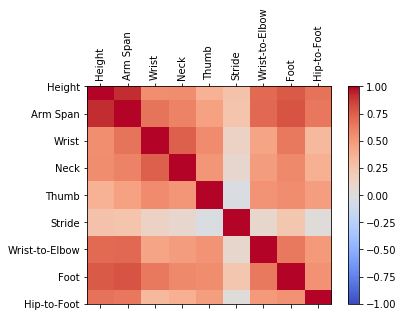

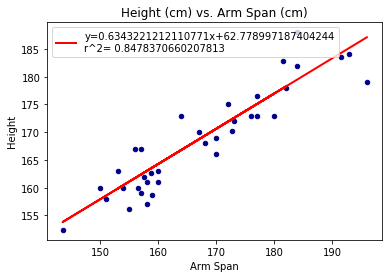

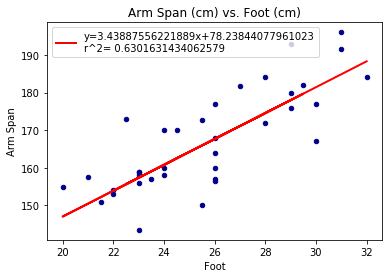

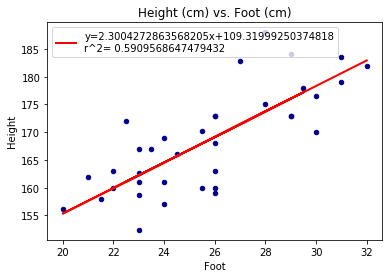

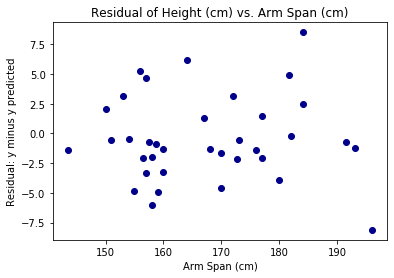

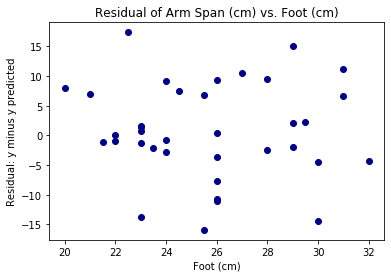

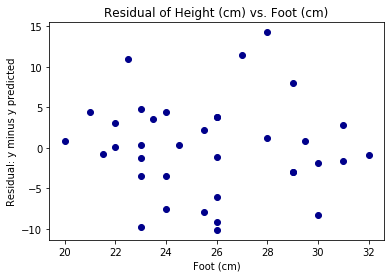

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math

data = pd.read_csv("Measurements.csv")


### REMOVING OUTLIERS ###
removes_outliers = True

if removes_outliers:
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[((data > (Q1-1.5*IQR)) & (data < (Q3+1.5*IQR)))] # kill outliers
    data = data[~np.isnan(data).any(axis=1)] # don't keep NaN rows
    
#Get Pearson correlation coefficients for each set of variables
corr = data.corr()

#Print correlation tables
m = len(list(corr))
v1="Variable 1"
v2="Variable 2"
cc="r"
ccs = "r^2"
cordf = pd.DataFrame(columns=[ccs,cc,v1,v2])
for i in range(0,m):
    for j in range(0,i):
        a, b = list(corr)[i], list(corr)[j]
        cordf = cordf.append({v1:a,v2:b, cc:corr[a][b]}, ignore_index=True)
cordf[ccs] = cordf[cc]**2
cordf=cordf.sort_values(ccs,ascending=False)

cs = corr ** 2
cs["sum"]=cs.sum()
cs = cs.sort_values("sum",ascending=False)

def print_tables():
    print("Set of variables vs r^2, where r is the Pearson correlation coefficient")
    print(cordf)
    print("\nVariable\tSum of r^2")
    print(cs["sum"])



#Print heatmap for correlation
def heatmap():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(data.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels(data.columns)
    plt.show()

#Print scatterplots
def scatter(num, describe_relationship=False, regress_vs_residual=False):
    for i in range(0,num):
        x, y = cordf.iloc[i][v1], cordf.iloc[i][v2]
        
        s = "positive" if cordf.iloc[i][cc]>0 else "negative"
        
        # Chart labels
        ttl = y+" (cm) vs. "+x+" (cm)"
        xlbl = x+" (cm)"
        
        X = data[x].values.reshape(-1,1)
        Y = data[y].values.reshape(-1,1)
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
        regressor = LinearRegression()  
        regressor.fit(X_train, y_train)
        
        X_test = np.append(X_test, np.array([min(X_train), max(X_train)]),axis=0)
        y_pred = regressor.predict(X_test)
        lbl = 'y='+str(regressor.coef_[0][0])+'x+'+str(regressor.intercept_[0])
        lbl += "\nr^2= " + str(cordf.iloc[i][cc] ** 2) 
        if regress_vs_residual:
            residual = Y - regressor.predict(X)
            plt.scatter(x=X, y=residual, c='DarkBlue')
            plt.title("Residual of "+ttl)
            plt.xlabel(xlbl)
            plt.ylabel("Residual: y minus y predicted")
            plt.show()
        else: 
            data.plot.scatter(x=x, y=y, c='DarkBlue', title=ttl)
            plt.plot(X_test, y_pred, color='red', linewidth=2, label=lbl)
            plt.legend(loc='upper left')
            if describe_relationship:
                t = "The direction of the relationship was "+s+",\nand the strength of relationship can be told\nby the Pearson correlation coefficient,\nwhich was "+str(cordf.iloc[i][cc]) + "."
                plt.figtext(0.5, -0.2, t, wrap=True, horizontalalignment='center', fontsize=12)
            plt.show()

    
print_tables()
heatmap()
scatter(3)
scatter(3, regress_vs_residual=True)